# Аудиториска вежба 3: Data Analysis & Visualization



### <font color='green'>Data Analysis</font>

Data analysis is the process of cleaning, changing, and processing raw data, and extracting actionable, relevant information that helps businesses make informed decisions. 

The procedure helps reduce the risks inherent in decision-making by providing useful insights and statistics, often presented in charts, images, tables, and graphs.

A simple example of data analysis can be seen whenever we take a decision in our daily lives by evaluating what has happened in the past or what will happen if we make that decision. Basically, this is the process of analyzing the past or future and making a decision based on that analysis.

It’s not uncommon to hear the term “big data” brought up in discussions about data analysis. Data analysis plays a crucial role in processing big data into useful information.

#### Variables: Continuous variables
*   Mean (Average)
*   Median (Middle value)
*   Standard deviation
*   Minimum
*   Maximum
*   Quantile
*   Geometric mean

#### Variables: Categorical variables
*   Frequencies (count or relative) - can be transformed to numeric values

#### Distributions: Normal distribution
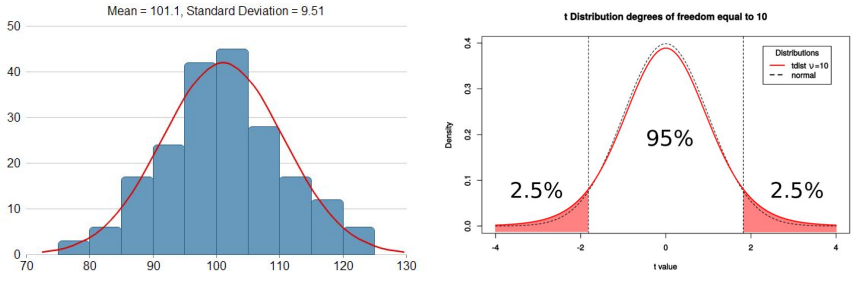

#### Distributions: Gamma distribution 
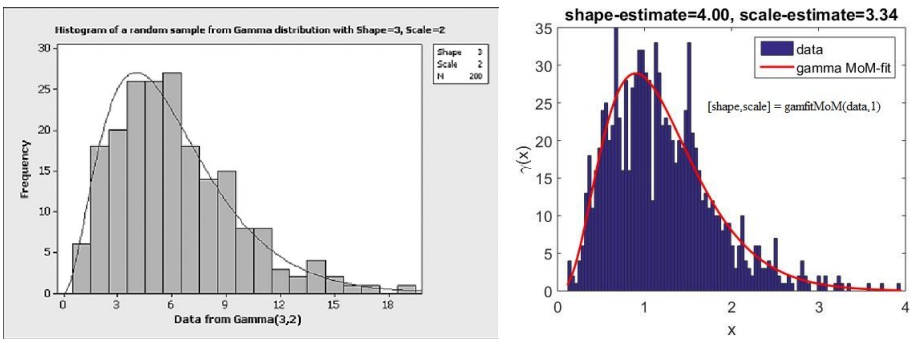

#### Distributions: Exponential distribution
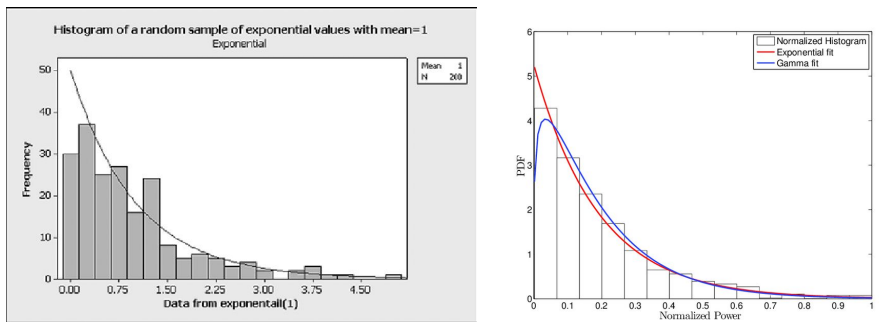



### <font color='pink'>Visualization</font>
*   Distribution: Histograms, Bar-charts
*   Show trend over time: Stacked area plots
*   Relationship: Scatter plots, Multiple histograms, KDE(Kernel Density Estimation), Box-plots






### <font color='red'>The goal of this exercise</font>

The visual representation of the data will
lead to new information:
*   See how our data behaves
*   See the difference between big amount of
data and small dataset

In [1]:
import pandas as pd
import requests
import random

from bs4 import BeautifulSoup

from datetime import date

In [2]:
import warnings

requests.packages.urllib3.disable_warnings()
warnings.filterwarnings("ignore")

In [5]:
def get_data(url, path):
    response = requests.get(url)
    html = BeautifulSoup(response.text, "html.parser")

    news_items = html.find_all('div', {'class': 'Layout-layout'})
    news = []

    #Note: By taking the data from each item separately we make sure that all data we have on the item is its own.
    for i in range(0, len(news_items)):
        item = {}
        card_date = news_items[i].select_one('.Card-time').text

        #Note: We need to format the date in the desired format.
        if 'ago' in card_date:
            item['Date'] = date.today().strftime("%a, %b %dth %Y")
        else:
            item['Date'] = card_date

        item["Title"] = news_items[i].select_one('.Card-title').text

        category = news_items[i].select_one('.Card-eyebrow')

        #Note: We fill the category to be 'No category' in cases where a category is not present.
        if category is None:
            item['Category'] = 'No category'
        else:
            item["Category"] = news_items[i].select_one('.Card-eyebrow').select_one('div').text

        #Note: This data is not related to the web pages we scrape, and are here for demonstration only.
        item['Popularity'] = random.randint(1, len(news_items)) * 10
        item['User comments'] = random.randint(70, 100)

        news.append(item)

    #Note: The idea here is to make the function as automated as possible i.e. for us to save parameters in some place and then call the function X times with those parameters without us watching over it.
    df = pd.DataFrame(news)
    url_parts = url.split("/")
    file_name = path + "/results_" + url_parts[3] + ".csv"
    df.to_csv(file_name, index=False)

    return df

In [13]:
economy_url = "https://www.cnbc.com/economy/"
finance_url = "https://www.cnbc.com/finance/"
health_science_url = "https://www.cnbc.com/health-and-science/"
energy_url = "https://www.cnbc.com/energy/"
climate_url = "https://www.cnbc.com/climate/"

#Note: Change the path so that this works for you too!
# path = "/content/drive/MyDrive/ВНП 22 23 - Вежби/Аудиториски вежби/03"
path = 'prv_kol_datasets/aud3'

economy_data = get_data(economy_url, path)
finance_data = get_data(finance_url, path)
health_science_data = get_data(health_science_url, path)
energy_data = get_data(energy_url, path)
climate_data = get_data(climate_url, path)

In [14]:
economy_data.head(3)

,Date,Title,Category,Popularity,User comments
0,"Thu, Nov 30th 2023",Fed's favorite gauge shows inflation rose 0.2%...,No category,50,96
1,"Wed, Nov 29th 2023","GDP grew at a 5.2% rate in the third quarter, ...",No category,50,96
2,"Tue, Nov 28th 2023",Fed's Waller confident that policy is in the r...,Economy,10,70


In [15]:
economy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           7 non-null      object
 1   Title          7 non-null      object
 2   Category       7 non-null      object
 3   Popularity     7 non-null      int64 
 4   User comments  7 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 408.0+ bytes


In [16]:
health_science_data.head(3)

,Date,Title,Category,Popularity,User comments
0,"Sat, Dec 2nd 2023",Pfizer's twice-daily weight loss pill joins a ...,No category,50,84
1,"Fri, Dec 1st 2023",Pfizer to pull twice-daily weight loss pill du...,No category,70,92
2,"Thu, Nov 30th 2023",Cramer blasts prospect of Humana-Cigna deal: R...,Analysis,70,72


In [17]:
health_science_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           7 non-null      object
 1   Title          7 non-null      object
 2   Category       7 non-null      object
 3   Popularity     7 non-null      int64 
 4   User comments  7 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 408.0+ bytes


In [18]:
finance_data.head(3)

,Date,Title,Category,Popularity,User comments
0,"Sat, Dec 2nd 2023",Case for gold fever: NewEdge Wealth sees recor...,No category,10,80
1,"Fri, Dec 1st 2023",Zero-day commodity options have now entered th...,No category,10,73
2,"Fri, Dec 1st 2023",Fed Chair Powell calls talk of cutting rates '...,Federal Reserve,30,94


In [19]:
finance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           7 non-null      object
 1   Title          7 non-null      object
 2   Category       7 non-null      object
 3   Popularity     7 non-null      int64 
 4   User comments  7 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 408.0+ bytes


In [20]:
energy_data.head(3)

,Date,Title,Category,Popularity,User comments
0,"Sat, Dec 2nd 2023",Exxon Mobil CEO urges COP28 to focus on reduci...,No category,10,74
1,"Fri, Dec 1st 2023",JPMorgan is out with its global commodities ou...,No category,60,94
2,"Thu, Nov 30th 2023",Coinbase rallies more than 60% in same month F...,Tech,70,78


In [21]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           7 non-null      object
 1   Title          7 non-null      object
 2   Category       7 non-null      object
 3   Popularity     7 non-null      int64 
 4   User comments  7 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 408.0+ bytes


In [22]:
climate_data.head()

,Date,Title,Category,Popularity,User comments
0,"Fri, Dec 1st 2023",Bill Gates warns the world is likely to smash ...,No category,20,75
1,"Sat, Dec 2nd 2023",Exxon Mobil CEO urges COP28 climate summit to ...,No category,60,99
2,"Fri, Dec 1st 2023",Elon Musk hypes Tesla Cybertruck at deliveries...,Tech,50,97
3,"Thu, Nov 30th 2023","A showdown is brewing over money, oil and carb...",COP28,70,73
4,"Thu, Nov 30th 2023",Nuclear's uncertain role in the shift away fro...,COP28,50,88


In [23]:
climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           7 non-null      object
 1   Title          7 non-null      object
 2   Category       7 non-null      object
 3   Popularity     7 non-null      int64 
 4   User comments  7 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 408.0+ bytes


In [24]:
#Note: We can read from a csv file using this function, and the result is a Pandas DataFrame.\

#Note: Change the paths so that this works for you too!
df_economy = pd.read_csv('prv_kol_datasets/aud3/results_economy.csv')
df_finance = pd.read_csv('prv_kol_datasets/aud3/results_finance.csv')
df_health_science = pd.read_csv(
    'prv_kol_datasets/aud3/results_health-and-science.csv')
df_energy = pd.read_csv('prv_kol_datasets/aud3/results_energy.csv')
df_climate = pd.read_csv('prv_kol_datasets/aud3/results_climate.csv')

#### <font color='green'>Quick Exploratory Data Analysis</font>


In [25]:
df_economy.head(3)

,Date,Title,Category,Popularity,User comments
0,"Thu, Nov 30th 2023",Fed's favorite gauge shows inflation rose 0.2%...,No category,50,96
1,"Wed, Nov 29th 2023","GDP grew at a 5.2% rate in the third quarter, ...",No category,50,96
2,"Tue, Nov 28th 2023",Fed's Waller confident that policy is in the r...,Economy,10,70


In [26]:
df_economy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           7 non-null      object
 1   Title          7 non-null      object
 2   Category       7 non-null      object
 3   Popularity     7 non-null      int64 
 4   User comments  7 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 408.0+ bytes


In [27]:
df_finance.head(3)

,Date,Title,Category,Popularity,User comments
0,"Sat, Dec 2nd 2023",Case for gold fever: NewEdge Wealth sees recor...,No category,10,80
1,"Fri, Dec 1st 2023",Zero-day commodity options have now entered th...,No category,10,73
2,"Fri, Dec 1st 2023",Fed Chair Powell calls talk of cutting rates '...,Federal Reserve,30,94


In [28]:
df_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           7 non-null      object
 1   Title          7 non-null      object
 2   Category       7 non-null      object
 3   Popularity     7 non-null      int64 
 4   User comments  7 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 408.0+ bytes


In [29]:
df_health_science.head(3)

,Date,Title,Category,Popularity,User comments
0,"Sat, Dec 2nd 2023",Pfizer's twice-daily weight loss pill joins a ...,No category,50,84
1,"Fri, Dec 1st 2023",Pfizer to pull twice-daily weight loss pill du...,No category,70,92
2,"Thu, Nov 30th 2023",Cramer blasts prospect of Humana-Cigna deal: R...,Analysis,70,72


In [30]:
df_health_science.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           7 non-null      object
 1   Title          7 non-null      object
 2   Category       7 non-null      object
 3   Popularity     7 non-null      int64 
 4   User comments  7 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 408.0+ bytes


In [31]:
df_energy.head(3)

,Date,Title,Category,Popularity,User comments
0,"Sat, Dec 2nd 2023",Exxon Mobil CEO urges COP28 to focus on reduci...,No category,10,74
1,"Fri, Dec 1st 2023",JPMorgan is out with its global commodities ou...,No category,60,94
2,"Thu, Nov 30th 2023",Coinbase rallies more than 60% in same month F...,Tech,70,78


In [32]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           7 non-null      object
 1   Title          7 non-null      object
 2   Category       7 non-null      object
 3   Popularity     7 non-null      int64 
 4   User comments  7 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 408.0+ bytes


In [33]:
df_climate.head()

,Date,Title,Category,Popularity,User comments
0,"Fri, Dec 1st 2023",Bill Gates warns the world is likely to smash ...,No category,20,75
1,"Sat, Dec 2nd 2023",Exxon Mobil CEO urges COP28 climate summit to ...,No category,60,99
2,"Fri, Dec 1st 2023",Elon Musk hypes Tesla Cybertruck at deliveries...,Tech,50,97
3,"Thu, Nov 30th 2023","A showdown is brewing over money, oil and carb...",COP28,70,73
4,"Thu, Nov 30th 2023",Nuclear's uncertain role in the shift away fro...,COP28,50,88


In [34]:
df_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           7 non-null      object
 1   Title          7 non-null      object
 2   Category       7 non-null      object
 3   Popularity     7 non-null      int64 
 4   User comments  7 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 408.0+ bytes


In [35]:
#Note: We can filter data in the following manner.
popularity = 10
df_climate_exact_popularity = df_climate[df_climate.Popularity == popularity]
df_climate_exact_popularity

,Date,Title,Category,Popularity,User comments


In [36]:
df_finance_market_insider = df_finance[df_finance.Category == 'Market Insider']
df_finance_market_insider.head()

,Date,Title,Category,Popularity,User comments
4,"Thu, Nov 30th 2023",Stocks making the biggest moves midday: Salesf...,Market Insider,10,80
5,"Wed, Nov 29th 2023",Stocks making the biggest moves after hours: S...,Market Insider,60,98
6,"Wed, Nov 29th 2023",Stocks making the biggest moves premarket: Gen...,Market Insider,60,85


In [37]:
df_finance_market_insider.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 4 to 6
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           3 non-null      object
 1   Title          3 non-null      object
 2   Category       3 non-null      object
 3   Popularity     3 non-null      int64 
 4   User comments  3 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 144.0+ bytes


In [38]:
#Note: We can sort data in the following way.
df_finance_market_insider.sort_values('Title').head()

,Date,Title,Category,Popularity,User comments
5,"Wed, Nov 29th 2023",Stocks making the biggest moves after hours: S...,Market Insider,60,98
4,"Thu, Nov 30th 2023",Stocks making the biggest moves midday: Salesf...,Market Insider,10,80
6,"Wed, Nov 29th 2023",Stocks making the biggest moves premarket: Gen...,Market Insider,60,85


In [39]:
df_finance_market_insider.sort_values('User comments').head()

,Date,Title,Category,Popularity,User comments
4,"Thu, Nov 30th 2023",Stocks making the biggest moves midday: Salesf...,Market Insider,10,80
6,"Wed, Nov 29th 2023",Stocks making the biggest moves premarket: Gen...,Market Insider,60,85
5,"Wed, Nov 29th 2023",Stocks making the biggest moves after hours: S...,Market Insider,60,98


In [40]:
df_finance_market_insider.sort_values('Popularity').head()

,Date,Title,Category,Popularity,User comments
4,"Thu, Nov 30th 2023",Stocks making the biggest moves midday: Salesf...,Market Insider,10,80
5,"Wed, Nov 29th 2023",Stocks making the biggest moves after hours: S...,Market Insider,60,98
6,"Wed, Nov 29th 2023",Stocks making the biggest moves premarket: Gen...,Market Insider,60,85


In [41]:
#Note: We can concatanate multiple datasets into one. As discussed in class - there's a major difference between concatanation and joining of datasets! Read more on the link below!
#Resource: https://realpython.com/pandas-merge-join-and-concat/#:~:text=merge()%20for%20combining%20data,DataFrames%20across%20rows%20or%20columns
df_all = pd.concat([df_economy, df_finance, df_health_science, df_energy, df_climate], ignore_index=True)
df_all

,Date,Title,Category,Popularity,User comments
0,"Thu, Nov 30th 2023",Fed's favorite gauge shows inflation rose 0.2%...,No category,50,96
1,"Wed, Nov 29th 2023","GDP grew at a 5.2% rate in the third quarter, ...",No category,50,96
2,"Tue, Nov 28th 2023",Fed's Waller confident that policy is in the r...,Economy,10,70
3,"Wed, Nov 15th 2023",Wholesale prices fell 0.5% in October for bigg...,Economy,30,72
4,"Fri, Nov 3rd 2023",Here's where the jobs are for October 2023 — i...,Economy,20,92
5,"Thu, Nov 2nd 2023",Labor costs show surprise decline in the third...,Economy,40,70
6,"Fri, Oct 27th 2023",Key Fed inflation gauge rose 0.3% as expected ...,Economy,50,83
7,"Sat, Dec 2nd 2023",Case for gold fever: NewEdge Wealth sees recor...,No category,10,80
8,"Fri, Dec 1st 2023",Zero-day commodity options have now entered th...,No category,10,73
9,"Fri, Dec 1st 2023",Fed Chair Powell calls talk of cutting rates '...,Federal Reserve,30,94


In [42]:
df_all.sort_values('Popularity').tail(3)

,Date,Title,Category,Popularity,User comments
15,"Fri, Dec 1st 2023",Pfizer to pull twice-daily weight loss pill du...,No category,70,92
31,"Thu, Nov 30th 2023","A showdown is brewing over money, oil and carb...",COP28,70,73
23,"Thu, Nov 30th 2023",Coinbase rallies more than 60% in same month F...,Tech,70,78


#### <font color='pink'>Continuous Variables</font>


In [43]:
df_economy.median()

Popularity       40.0
User comments    83.0
dtype: float64

In [44]:
df_economy['Popularity'].median()

40.0

In [45]:
df_energy.median()

Popularity       50.0
User comments    83.0
dtype: float64

In [46]:
df_health_science.median()

Popularity       70.0
User comments    88.0
dtype: float64

In [47]:
df_health_science['Popularity'].median()

70.0

In [48]:
df_health_science['User comments'].median()

88.0

In [49]:
df_finance.median()

Popularity       20.0
User comments    84.0
dtype: float64

In [50]:
df_climate.median()

Popularity       50.0
User comments    88.0
dtype: float64

In [51]:
#Note: Median is the middle value in the dataset, when sorted.
df_all.median()

Popularity       50.0
User comments    84.0
dtype: float64

In [52]:
#Note: Mean is the average of the dataset.
df_all.mean()

Popularity       43.142857
User comments    84.257143
dtype: float64

In [53]:
#Note: Standard deviation represents the diversity of the data points. 
df_all.std()

Popularity       21.250803
User comments     9.506477
dtype: float64

In [54]:
df_all.quantile([.1, .25, .5, .75, 1], axis=0)

,Popularity,User comments
0.10,10.0,72.4
0.25,25.0,74.5
0.50,50.0,84.0
0.75,60.0,93.0
1.00,70.0,99.0


In [55]:
df_all.iloc[:, 3:5]

,Popularity,User comments
0,50,96
1,50,96
2,10,70
3,30,72
4,20,92
5,40,70
6,50,83
7,10,80
8,10,73
9,30,94


In [56]:
from scipy import stats

stats.gmean(df_all.iloc[:, 3:4], axis=0)

array([36.2839004])

In [57]:
df_all.Popularity.value_counts()

50    8
70    7
10    5
30    5
60    5
20    4
40    1
Name: Popularity, dtype: int64

In [58]:
df_all.Category.value_counts()

No category           10
Economy                5
Tech                   4
Market Insider         3
COP28                  3
Analysis               2
Federal Reserve        1
Markets                1
Morning Meeting        1
Health and Science     1
Sustainable Future     1
Oil and Gas            1
State of Freight       1
Investing              1
Name: Category, dtype: int64

In [59]:
df_all['User comments'].value_counts()

73    3
94    3
88    3
96    2
72    2
92    2
83    2
80    2
84    2
70    2
85    2
99    2
74    2
76    1
75    1
98    1
78    1
90    1
97    1
Name: User comments, dtype: int64

#### <font color='orange'>Data Visualization</font>

In [61]:
import matplotlib.pyplot as plt

##### Distribution

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'No category'),
  Text(1, 0, 'Economy'),
  Text(2, 0, 'Federal Reserve'),
  Text(3, 0, 'Markets'),
  Text(4, 0, 'Market Insider'),
  Text(5, 0, 'Analysis'),
  Text(6, 0, 'Morning Meeting'),
  Text(7, 0, 'COP28'),
  Text(8, 0, 'Health and Science'),
  Text(9, 0, 'Tech'),
  Text(10, 0, 'Sustainable Future'),
  Text(11, 0, 'Oil and Gas'),
  Text(12, 0, 'State of Freight'),
  Text(13, 0, 'Investing')])

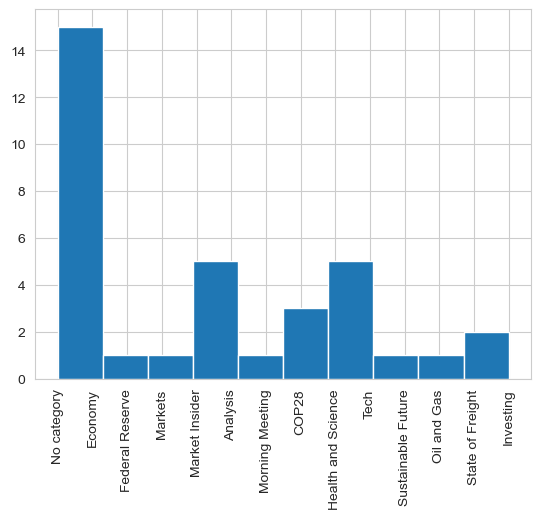

In [62]:
#Note: A histogram is a statistical tool that represents data distribution.
#Resource: https://www.educba.com/histogram-examples/
df_all['Category'].hist()
plt.xticks(rotation=90)

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80')])

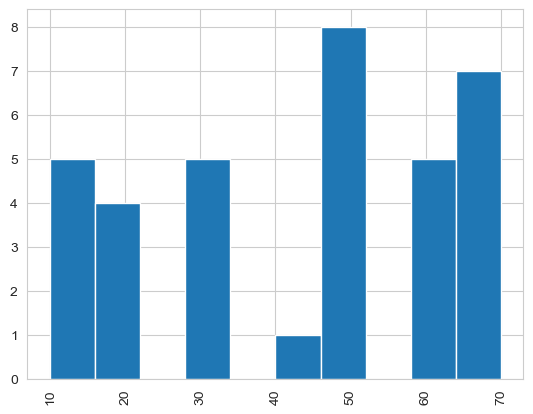

In [63]:
df_all['Popularity'].hist()
plt.xticks(rotation=90)

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80')])

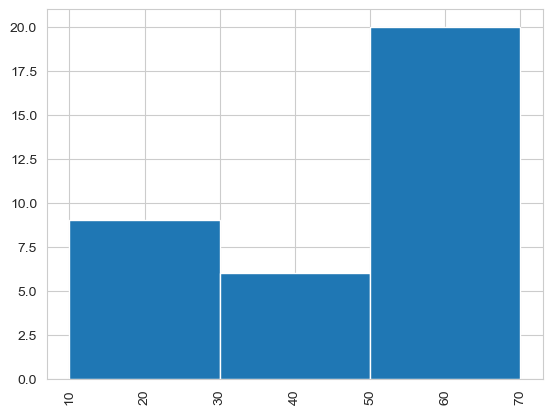

In [64]:
df_all['Popularity'].hist(bins=3)
plt.xticks(rotation=90)

(array([ 65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.]),
 [Text(65.0, 0, '65'),
  Text(70.0, 0, '70'),
  Text(75.0, 0, '75'),
  Text(80.0, 0, '80'),
  Text(85.0, 0, '85'),
  Text(90.0, 0, '90'),
  Text(95.0, 0, '95'),
  Text(100.0, 0, '100'),
  Text(105.0, 0, '105')])

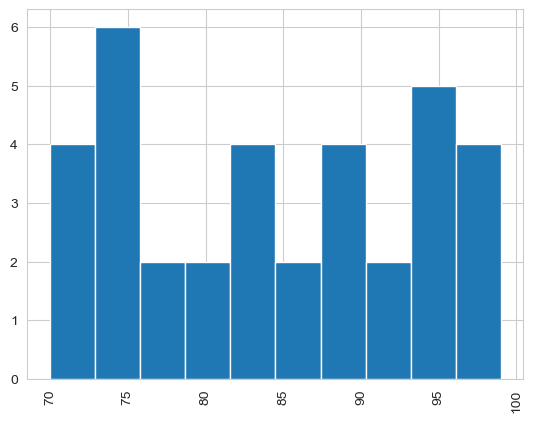

In [65]:
df_all['User comments'].hist()
plt.xticks(rotation=90)

<Axes: >

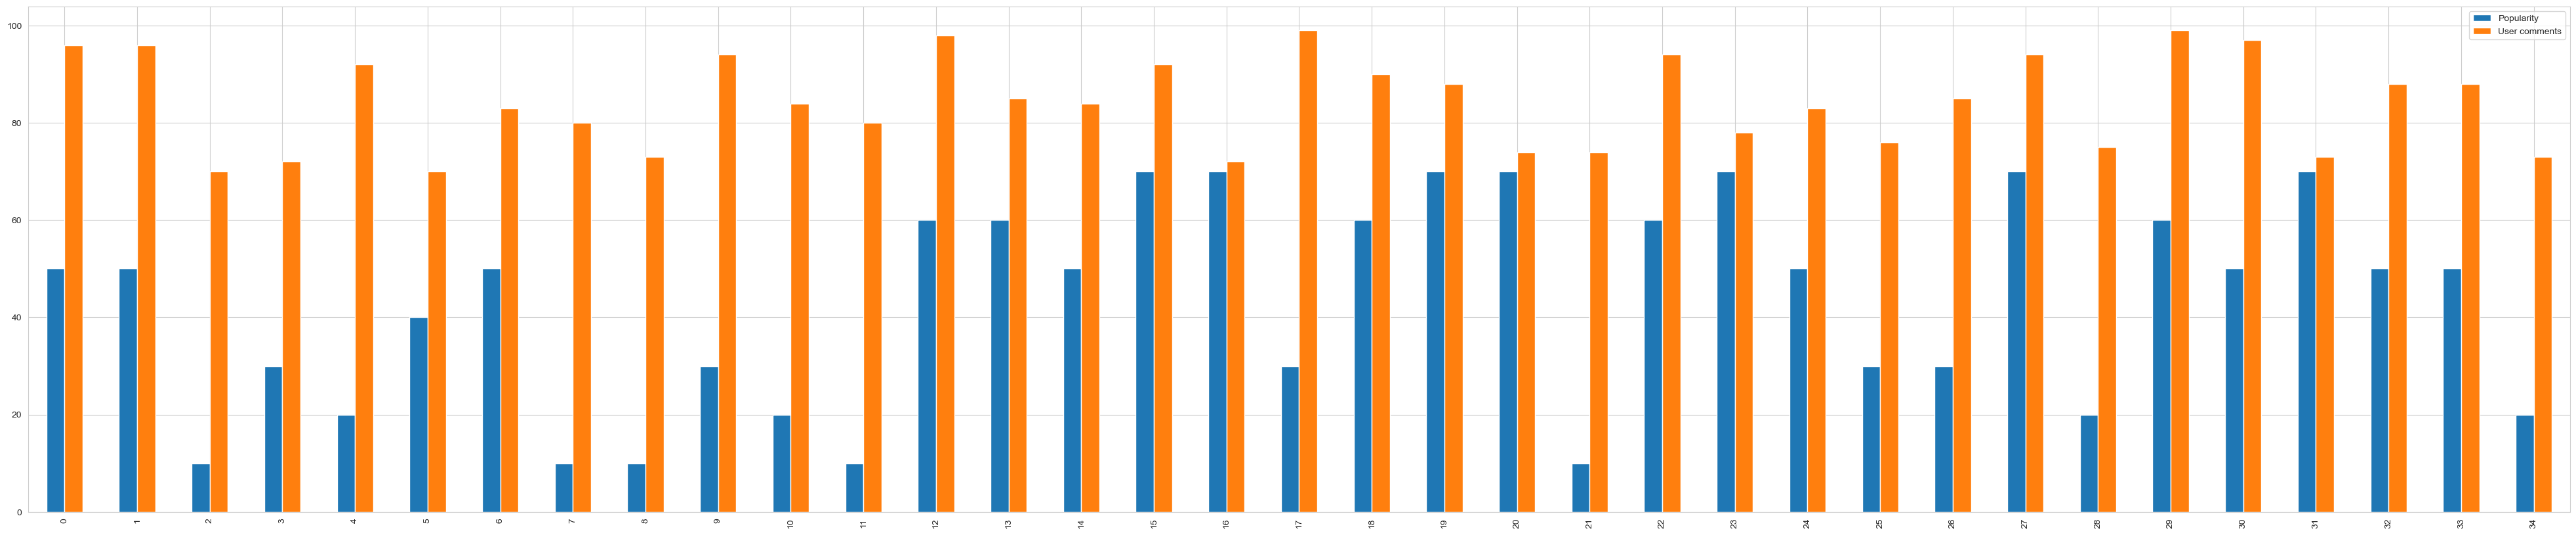

In [66]:
#Note: A bar chart plots numeric values for levels of a categorical feature as bars.
#Resource: https://chartio.com/learn/charts/bar-chart-complete-guide/
df_all.plot.bar(figsize=(50, 10))

<Axes: >

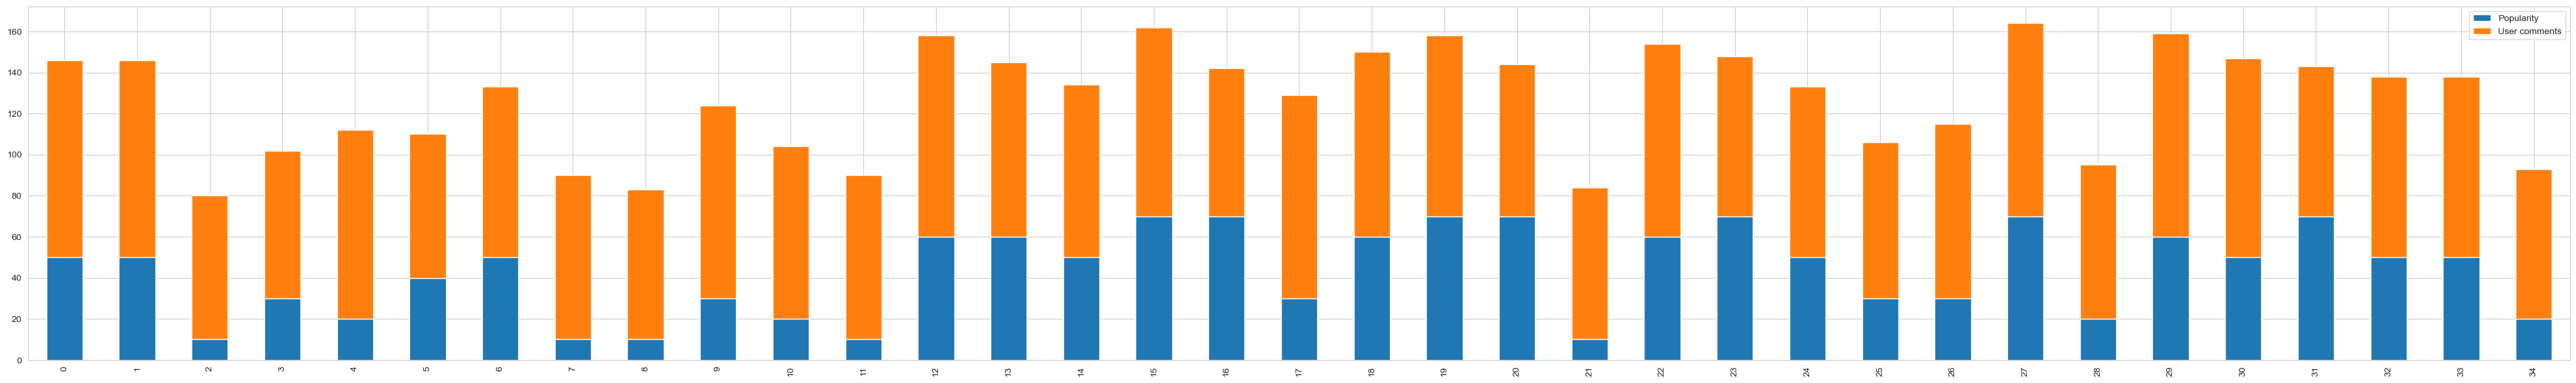

In [67]:
df_all.plot.bar(figsize=(50, 7), stacked=True)

array([<Axes: title={'center': 'Popularity'}>,
       <Axes: title={'center': 'User comments'}>], dtype=object)

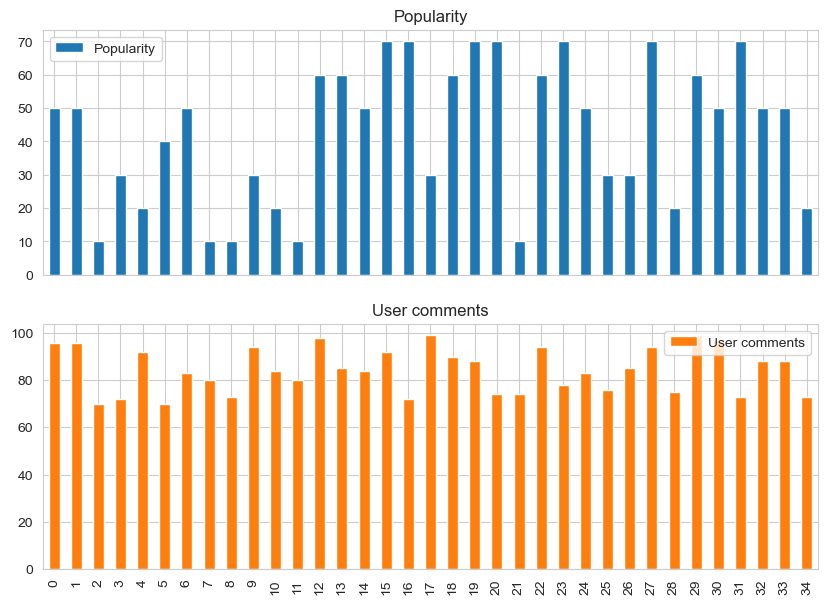

In [68]:
df_all.plot.bar(figsize=(10, 7), subplots=True)

##### Showing trend over time

<Axes: >

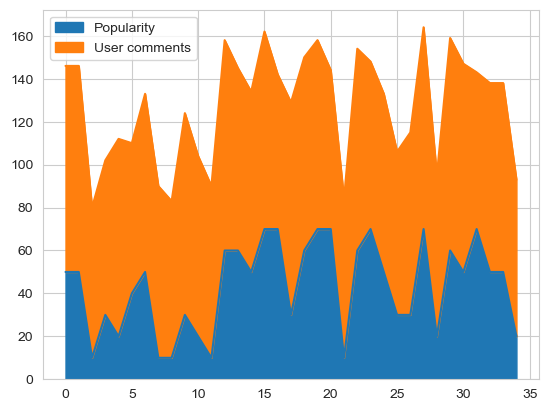

In [69]:
#Note: Area charts are commonly used to showcase data that depicts a Time Series relationship.
#Usage: https://www.fusioncharts.com/resources/chart-primers/area-chart
df_all.plot.area()

##### Relationships

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'No category'),
  Text(1, 0, 'Economy'),
  Text(2, 0, 'Federal Reserve'),
  Text(3, 0, 'Markets'),
  Text(4, 0, 'Market Insider'),
  Text(5, 0, 'Analysis'),
  Text(6, 0, 'Morning Meeting'),
  Text(7, 0, 'COP28'),
  Text(8, 0, 'Health and Science'),
  Text(9, 0, 'Tech'),
  Text(10, 0, 'Sustainable Future'),
  Text(11, 0, 'Oil and Gas'),
  Text(12, 0, 'State of Freight'),
  Text(13, 0, 'Investing')])

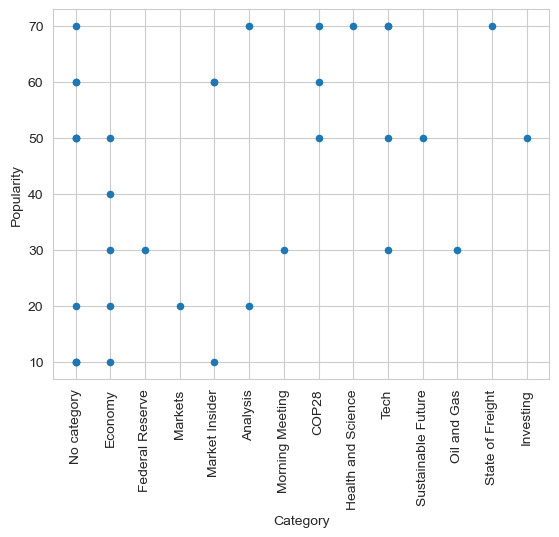

In [70]:
#Note: A scatter plot is a special type of graph designed to show the relationship between two variables.
#Resource: https://www.dummies.com/article/business-careers-money/business/accounting/calculation-analysis/use-scatter-plots-to-identify-a-linear-relationship-in-simple-regression-analysis-145935/
df_all.plot.scatter(x='Category', y='Popularity')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Thu, Nov 30th 2023'),
  Text(1, 0, 'Wed, Nov 29th 2023'),
  Text(2, 0, 'Tue, Nov 28th 2023'),
  Text(3, 0, 'Wed, Nov 15th 2023'),
  Text(4, 0, 'Fri, Nov 3rd 2023'),
  Text(5, 0, 'Thu, Nov 2nd 2023'),
  Text(6, 0, 'Fri, Oct 27th 2023'),
  Text(7, 0, 'Sat, Dec 2nd 2023'),
  Text(8, 0, 'Fri, Dec 1st 2023'),
  Text(9, 0, 'Mon, Nov 27th 2023'),
  Text(10, 0, 'Mon, Nov 20th 2023'),
  Text(11, 0, 'Sat, Nov 11th 2023'),
  Text(12, 0, 'Wed, Nov 8th 2023'),
  Text(13, 0, 'Thu, Nov 16th 2023'),
  Text(14, 0, 'Tue, Nov 21st 2023'),
  Text(15, 0, 'Mon, Nov 13th 2023')])

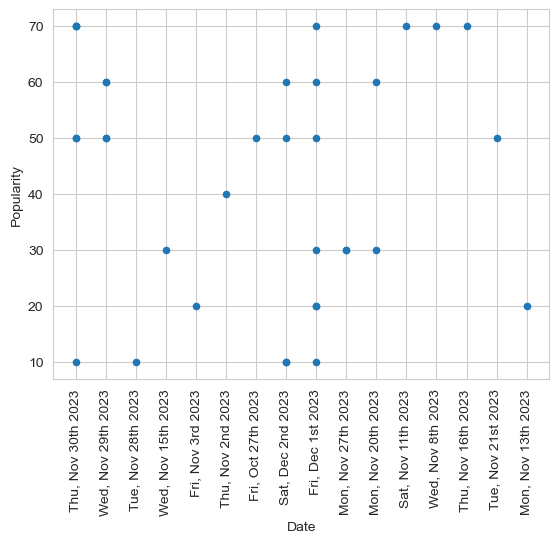

In [71]:
df_all.plot.scatter(x='Date', y='Popularity')
plt.xticks(rotation=90)

In [72]:
#Note: We can use the groupby function in Pandas to group the data using a criteria. Here we group by Popularity and then count the items in each Popularity group.
df_all.groupby('Popularity').count()['Title']

Popularity
10    5
20    4
30    5
40    1
50    8
60    5
70    7
Name: Title, dtype: int64

In [73]:
df_all.groupby('Category').count()

,Date,Title,Popularity,User comments
Category,,,,
Analysis,2,2,2,2
COP28,3,3,3,3
Economy,5,5,5,5
Federal Reserve,1,1,1,1
Health and Science,1,1,1,1
Investing,1,1,1,1
Market Insider,3,3,3,3
Markets,1,1,1,1
Morning Meeting,1,1,1,1


In [74]:
df_all.groupby('Category').count().Popularity

Category
Analysis               2
COP28                  3
Economy                5
Federal Reserve        1
Health and Science     1
Investing              1
Market Insider         3
Markets                1
Morning Meeting        1
No category           10
Oil and Gas            1
State of Freight       1
Sustainable Future     1
Tech                   4
Name: Popularity, dtype: int64

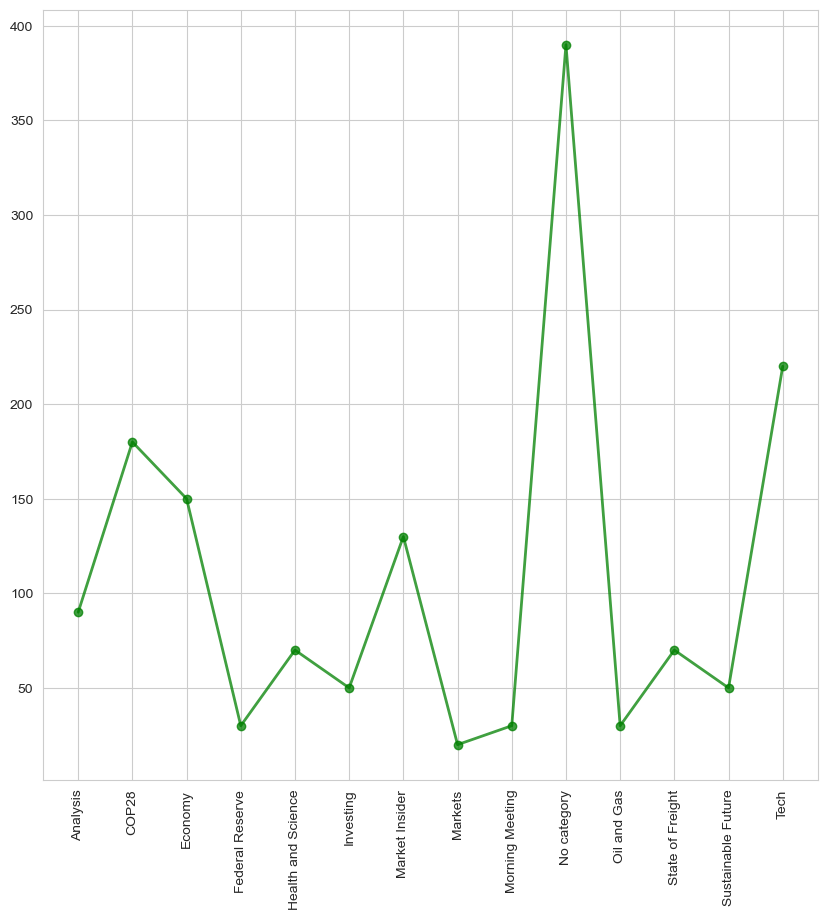

In [75]:
#Note: We can create more complex plots using various functionalities found in matplotlib.
#Note: '-og' means plotting the dots, using a normal line, in green color
#Note: linewidth - gives the line size, aplha - gives the opacity of the line
plt.figure(figsize=[10, 10])
plt.plot(df_all.groupby('Category').Popularity.sum(), '-og', linewidth='2', alpha=0.75)
plt.xticks(rotation=90)
plt.show()

##### Comparison

In [76]:
import seaborn as sns

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Thu, Nov 30th 2023'),
  Text(1, 0, 'Wed, Nov 29th 2023'),
  Text(2, 0, 'Tue, Nov 28th 2023'),
  Text(3, 0, 'Wed, Nov 15th 2023'),
  Text(4, 0, 'Fri, Nov 3rd 2023'),
  Text(5, 0, 'Thu, Nov 2nd 2023'),
  Text(6, 0, 'Fri, Oct 27th 2023'),
  Text(7, 0, 'Sat, Dec 2nd 2023'),
  Text(8, 0, 'Fri, Dec 1st 2023'),
  Text(9, 0, 'Mon, Nov 27th 2023'),
  Text(10, 0, 'Mon, Nov 20th 2023'),
  Text(11, 0, 'Sat, Nov 11th 2023'),
  Text(12, 0, 'Wed, Nov 8th 2023'),
  Text(13, 0, 'Thu, Nov 16th 2023'),
  Text(14, 0, 'Tue, Nov 21st 2023'),
  Text(15, 0, 'Mon, Nov 13th 2023')])

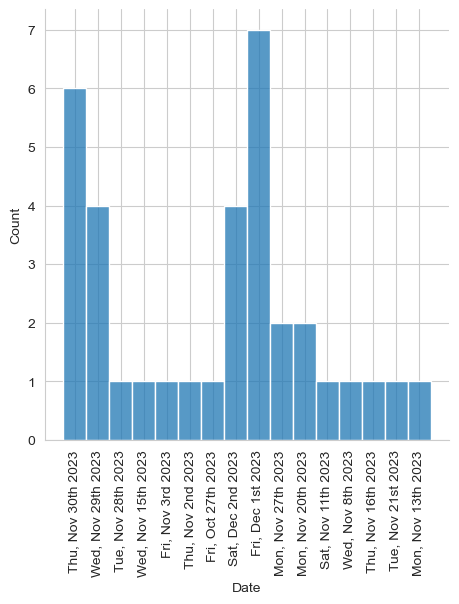

In [77]:
sns.displot(df_all['Date'], bins=3, kde=False)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Thu, Nov 30th 2023'),
  Text(1, 0, 'Wed, Nov 29th 2023'),
  Text(2, 0, 'Tue, Nov 28th 2023'),
  Text(3, 0, 'Wed, Nov 15th 2023'),
  Text(4, 0, 'Fri, Nov 3rd 2023'),
  Text(5, 0, 'Thu, Nov 2nd 2023'),
  Text(6, 0, 'Fri, Oct 27th 2023'),
  Text(7, 0, 'Sat, Dec 2nd 2023'),
  Text(8, 0, 'Fri, Dec 1st 2023'),
  Text(9, 0, 'Mon, Nov 27th 2023'),
  Text(10, 0, 'Mon, Nov 20th 2023'),
  Text(11, 0, 'Sat, Nov 11th 2023'),
  Text(12, 0, 'Wed, Nov 8th 2023'),
  Text(13, 0, 'Thu, Nov 16th 2023'),
  Text(14, 0, 'Tue, Nov 21st 2023'),
  Text(15, 0, 'Mon, Nov 13th 2023')])

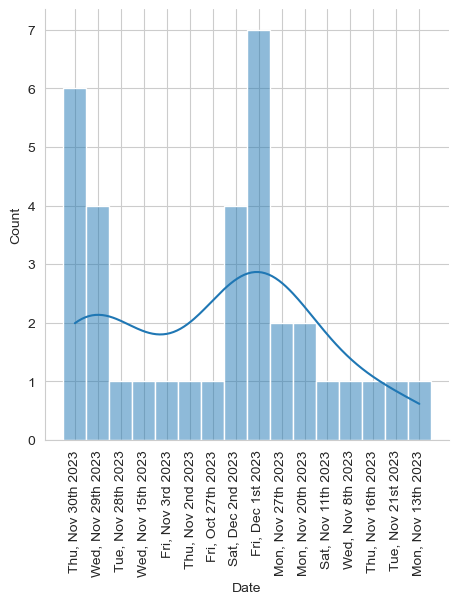

In [78]:
#Note: KDE is a technique that enables us to create a smooth curve given a set of data.
#Resource: https://mathisonian.github.io/kde/
sns.displot(df_all['Date'], bins=3, kde=True)
plt.xticks(rotation=90)

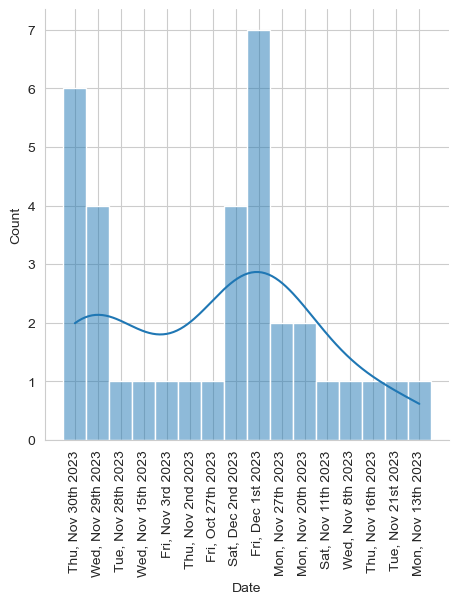

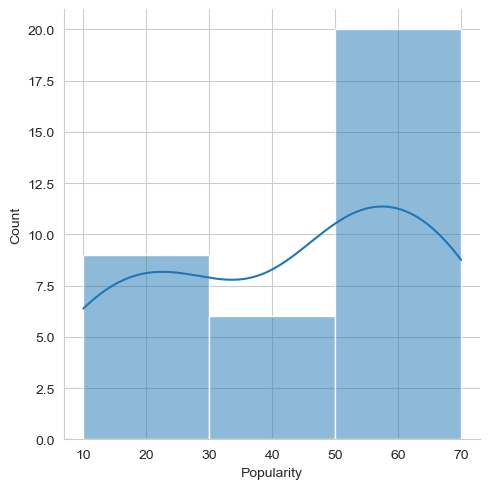

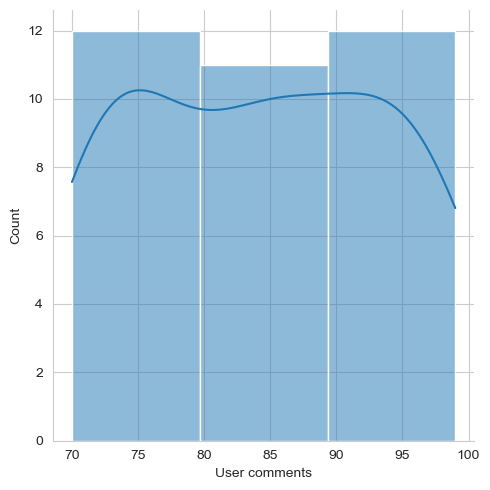

In [79]:
first_line = sns.displot(df_all['Date'], bins=3, kde=True, label='Date')
plt.xticks(rotation=90)

second_line = sns.displot(df_all['Popularity'], bins=3, kde=True, label='Popularity')
third_line = sns.displot(df_all['User comments'], bins=3, kde=True, label='User comments')

<Axes: >

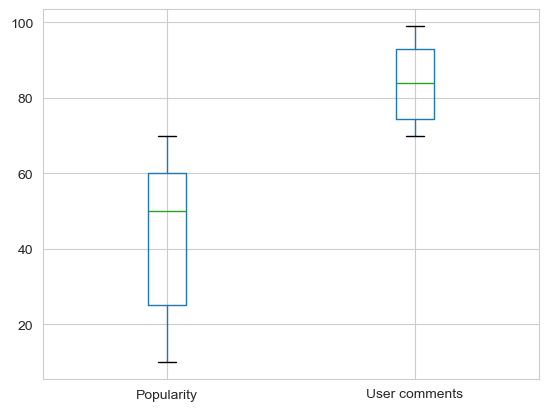

In [80]:
#Note: Box plot is used to show the distribution of numerical data through displaying the data quartiles and averages.
#Resource: https://www.simplypsychology.org/boxplots.html
df_all.boxplot()

<Axes: >

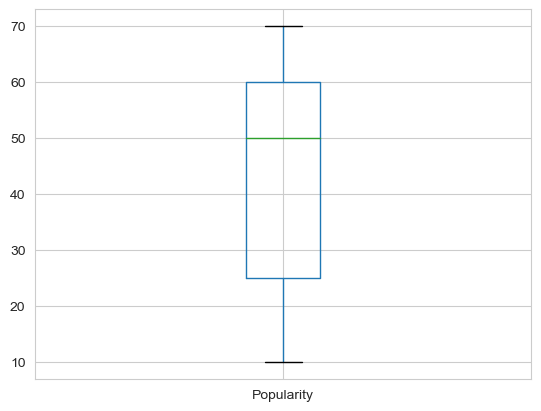

In [81]:
df_all.boxplot(column=['Popularity'])

<Axes: >

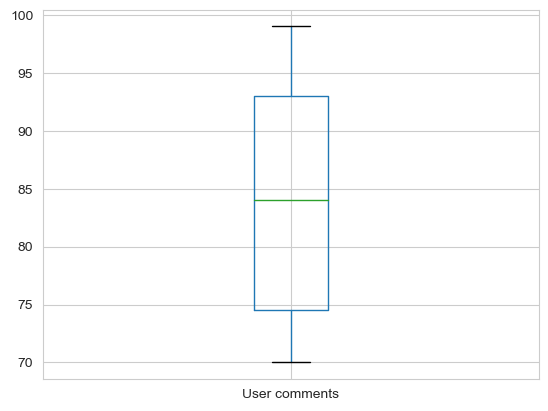

In [82]:
df_all.boxplot(column=['User comments']) 